In [62]:
import re

import pandas as pd

from m2t.dataset_utils import get_cropped_uri, fetch_true_example_id

In [79]:
# f = "../inference-results/v5/infer_results_musicnet_instruments_v5_100k.csv"
# infer_colname = 'model_completion_text'

# f = "../inference-results/ltu/ltu_musicnet_instruments.csv"
# infer_colname = 'ltu_caption'

# f = "/Users/joshg/projects/music2text/inference-results/ltu/ltu_musicnet_instruments.csv"
# infer_colname = 'ltu_caption'

f = "../inference-results/imagebind-llm/imagebind-llm_musicnet_instruments.csv"
infer_colname = 'imagebind_llm_caption'

infer_df = pd.read_csv(f)
infer_df['example_id'] = infer_df['example_id'].apply(fetch_true_example_id)

In [80]:
musicnet_df = pd.read_json(
    "../datasets/musicnet/musicnet-all-annotated-cropped-test.jsonl",
    lines=True)

In [81]:
# musicnet_df
musicnet_df['example_id'] = [get_cropped_uri(x['id'], x['start_secs'], x['end_secs'])
                             for _, x in musicnet_df.iterrows()]

In [82]:
infer_df = infer_df.merge(musicnet_df, on='example_id')

In [83]:
def parse_instruments_fn(notes_dict):
    inst = list(notes_dict.keys())
    inst = [re.sub("\d", "", x).strip().lower() for x in inst]
    return inst


infer_df['instruments'] = infer_df['notes'].apply(parse_instruments_fn)
infer_df['instruments']

0               [violin, cello, viola]
1               [violin, cello, viola]
2               [violin, cello, viola]
3     [bassoon, clarinet, french horn]
4     [bassoon, clarinet, french horn]
5     [bassoon, clarinet, french horn]
6     [bassoon, clarinet, french horn]
7     [bassoon, clarinet, french horn]
8                              [piano]
9                              [piano]
10                             [piano]
11                             [piano]
12                             [piano]
13                             [piano]
14                             [piano]
15                             [piano]
16                             [piano]
17                             [piano]
18                             [piano]
19                             [piano]
20                             [piano]
21                             [piano]
22                            [violin]
23                            [violin]
24                            [violin]
25                       

In [84]:
additional_instruments = ['fiddle', 'guitar', 'double bass', 'banjo', 'mandolin']
instruments = set([inst for inst_list in infer_df['instruments'] for inst in inst_list] + additional_instruments)
instruments

{'banjo',
 'bassoon',
 'cello',
 'clarinet',
 'double bass',
 'fiddle',
 'french horn',
 'guitar',
 'mandolin',
 'piano',
 'viola',
 'violin'}

In [85]:
infer_df

,example_id,prompt,imagebind_llm_caption,id,composer,composition,movement,ensemble,notes,tempo_in_beats_per_minute_madmom,downbeats_madmom,chords,key,start_secs,end_secs,instruments
0,2382-start0.000-end30.000,What instruments do you hear in the provided a...,"In the provided audio, I hear a violin and a p...",2382,Beethoven,String Quartet No 13 in B-flat major,2. Presto,String Quartet,"{'Violin': [{'start': 0.48, 'end': 0.77, 'pitc...",88.2,"[{'time': 0.47000000000000003, 'beat_number': ...","[{'start_time': 0.0, 'end_time': 1.2, 'chord':...",Bb major,0,30,"[violin, cello, viola]"
1,2382-start30.000-end60.000,What instruments do you hear in the provided a...,"In the provided audio, I hear a violin and a p...",2382,Beethoven,String Quartet No 13 in B-flat major,2. Presto,String Quartet,"{'Violin': [{'start': 0.02, 'end': 0.05, 'pitc...",88.2,"[{'time': 0.23, 'beat_number': 3}, {'time': 0....","[{'start_time': 1.8, 'end_time': 2.7, 'chord':...",Bb major,30,60,"[violin, cello, viola]"
2,2382-start60.000-end90.000,What instruments do you hear in the provided a...,"In the provided audio, I hear a violin and a p...",2382,Beethoven,String Quartet No 13 in B-flat major,2. Presto,String Quartet,"{'Violin': [{'start': 0.0, 'end': 0.06, 'pitch...",88.2,"[{'time': 0.24, 'beat_number': 1}, {'time': 0....","[{'start_time': 0, 'end_time': 7.5, 'chord': '...",Bb major,60,90,"[violin, cello, viola]"
3,1819-start0.000-end30.000,What instruments do you hear in the provided a...,I cannot provide specific details about the in...,1819,Mozart,Serenade in E-flat major,4. Menuetto,Pairs Clarinet-Horn-Bassoon,"{'Bassoon': [{'start': 1.18, 'end': 2.17, 'pit...",150.0,"[{'time': 0.6900000000000001, 'beat_number': 2...","[{'start_time': 0.0, 'end_time': 1.1, 'chord':...",Eb major,0,30,"[bassoon, clarinet, french horn]"
4,1819-start120.000-end150.000,What instruments do you hear in the provided a...,"In the provided audio, I hear a clarinet and a...",1819,Mozart,Serenade in E-flat major,4. Menuetto,Pairs Clarinet-Horn-Bassoon,"{'Bassoon': [{'start': 0, 'end': 0.19, 'pitch'...",150.0,"[{'time': 0.2, 'beat_number': 3}, {'time': 0.7...","[{'start_time': 0, 'end_time': 0.2, 'chord': '...",Eb major,120,150,"[bassoon, clarinet, french horn]"
5,1819-start30.000-end60.000,What instruments do you hear in the provided a...,"In the provided audio, I hear a clarinet and a...",1819,Mozart,Serenade in E-flat major,4. Menuetto,Pairs Clarinet-Horn-Bassoon,"{'Bassoon': [{'start': 0, 'end': 0.4, 'pitch':...",150.0,"[{'time': 0.06, 'beat_number': 3}, {'time': 0....","[{'start_time': 0, 'end_time': 0.7000000000000...",Eb major,30,60,"[bassoon, clarinet, french horn]"
6,1819-start60.000-end90.000,What instruments do you hear in the provided a...,"In the provided audio, I hear a violin and a p...",1819,Mozart,Serenade in E-flat major,4. Menuetto,Pairs Clarinet-Horn-Bassoon,"{'Bassoon': [{'start': 0, 'end': 0.06, 'pitch'...",150.0,"[{'time': 0.52, 'beat_number': 2}, {'time': 1....","[{'start_time': 0, 'end_time': 0.5, 'chord': '...",Eb major,60,90,"[bassoon, clarinet, french horn]"
7,1819-start90.000-end120.000,What instruments do you hear in the provided a...,"In the provided audio, I hear a symphony orche...",1819,Mozart,Serenade in E-flat major,4. Menuetto,Pairs Clarinet-Horn-Bassoon,"{'Bassoon': [{'start': 0, 'end': 0.05, 'pitch'...",150.0,"[{'time': 0.1, 'beat_number': 1}, {'time': 0.5...","[{'start_time': 0, 'end_time': 0.2, 'chord': '...",Eb major,90,120,"[bassoon, clarinet, french horn]"
8,1759-start0.000-end30.000,What instruments do you hear in the provided a...,"In the provided audio, you can hear a piano an...",1759,Schubert,Piano Sonata in C minor,3. Menuetto and Trio,Solo Piano,"{'Piano': [{'start': 2.7199999999999998, 'end'...",200.0,"[{'time': 2.52, 'beat_number': 3}, {'time': 3....","[{'start_time': 0.0, 'end_time': 2.6, 'chord':...",C minor,0,30,[piano]
9,1759-start120.000-end150.000,What instruments do you hear in the provided a...,I cannot provide specific d

In [86]:
def compute_f1(infer_df):
    tp = 0
    fp = 0
    fn = 0

    for _, row in infer_df.iterrows():
        tp += sum(x in row[infer_colname] for x in row['instruments'])
        fp += sum(x in row[infer_colname] for x in instruments if x not in row['instruments'])
        fn = sum(x not in row[infer_colname] for x in row['instruments'])
    # print(tp, fp, fn)
    f1 = (2 * tp / (2 * tp + fp + fn))
    return f1


f1s = []
from tqdm import tqdm

for _ in tqdm(range(1000)):
    tmp = infer_df.sample(n=len(infer_df), replace=True)
    f1 = compute_f1(tmp)
    f1s.append(f1)
    # print(f"f1 score: {f1}")

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.90it/s]


ci width is 0.05450100661489787
ci center is 0.857779695139488


(array([  6.,  29.,  50., 127., 199., 266., 171., 105.,  40.,   7.]),
 array([0.75675676, 0.77631918, 0.7958816 , 0.81544402, 0.83500644,
        0.85456885, 0.87413127, 0.89369369, 0.91325611, 0.93281853,
        0.95238095]),
 <BarContainer object of 10 artists>)

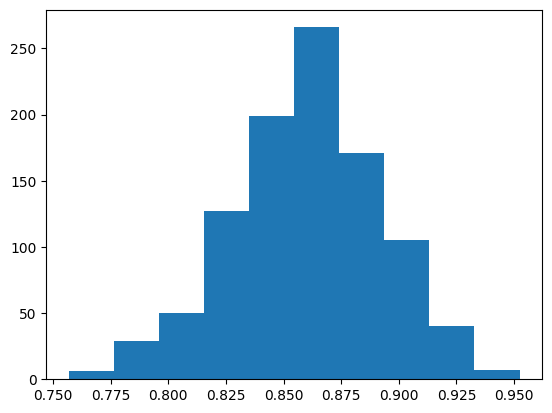

In [87]:
import matplotlib.pyplot as plt
import numpy as np

ci_lower, ci_upper = np.quantile(f1s, [0.05, 0.95])

ci_width = (ci_upper - ci_lower) / 2
print(f"ci width is {ci_width}")

ci_center = (ci_upper + ci_lower) / 2
print(f"ci center is {ci_center}")

plt.hist(f1s)

In [76]:
f1s = []
from tqdm import tqdm

for _ in tqdm(range(1000)):
    tmp = infer_df.sample(n=len(infer_df), replace=True)
    tmp[infer_colname] = 'piano'
    f1 = compute_f1(tmp)
    f1s.append(f1)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.76it/s]


ci width is 0.12512054001928644
ci center is 0.5513500482160077


(array([  4.,  16.,  25.,  69., 163., 252., 255., 143.,  61.,  12.]),
 array([0.28571429, 0.33246753, 0.37922078, 0.42597403, 0.47272727,
        0.51948052, 0.56623377, 0.61298701, 0.65974026, 0.70649351,
        0.75324675]),
 <BarContainer object of 10 artists>)

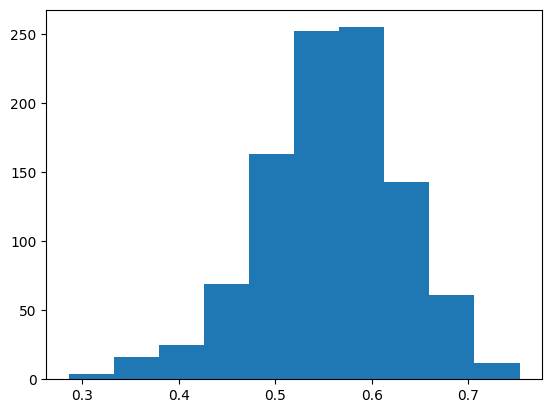

In [77]:
import matplotlib.pyplot as plt
import numpy as np

ci_lower, ci_upper = np.quantile(f1s, [0.05, 0.95])

ci_width = (ci_upper - ci_lower) / 2
print(f"ci width is {ci_width}")

ci_center = (ci_upper + ci_lower) / 2
print(f"ci center is {ci_center}")

plt.hist(f1s)